In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import util
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from mlp import MLP

/home/krecony/code/quick-mlp/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
X, Y = util.load_from_kaggle("yasserh/breast-cancer-dataset", "breast-cancer.csv", y_column=0, add_intercept=False, skip_first_column=True)

unique_labels = sorted(set(Y))  # sort to make mapping deterministic
mapping = {label: idx for idx, label in enumerate(unique_labels)}
Y = np.array([mapping[s] for s in Y])


X = X.astype(np.float64)
X = (X - X.mean(axis=0)) / X.std(axis=0)
Y = Y.astype(np.float64).reshape((Y.shape[0], 1))

Epoch 1/300 — loss: 0.4844, acc: 0.9062, val_loss: 0.4835, val_acc: 0.9123
Epoch 20/300 — loss: 0.0999, acc: 0.9668, val_loss: 0.0894, val_acc: 0.9649
Epoch 40/300 — loss: 0.0718, acc: 0.9844, val_loss: 0.0651, val_acc: 0.9825
Epoch 60/300 — loss: 0.0607, acc: 0.9844, val_loss: 0.0591, val_acc: 0.9825
Epoch 80/300 — loss: 0.0541, acc: 0.9863, val_loss: 0.0573, val_acc: 0.9825
Epoch 100/300 — loss: 0.0489, acc: 0.9863, val_loss: 0.0568, val_acc: 0.9825
Epoch 120/300 — loss: 0.0445, acc: 0.9883, val_loss: 0.0578, val_acc: 0.9825
Epoch 140/300 — loss: 0.0409, acc: 0.9922, val_loss: 0.0596, val_acc: 0.9825
Epoch 160/300 — loss: 0.0377, acc: 0.9922, val_loss: 0.0618, val_acc: 0.9825
Epoch 180/300 — loss: 0.0348, acc: 0.9941, val_loss: 0.0643, val_acc: 0.9825
Epoch 200/300 — loss: 0.0323, acc: 0.9941, val_loss: 0.0669, val_acc: 0.9825
Epoch 220/300 — loss: 0.0303, acc: 0.9941, val_loss: 0.0693, val_acc: 0.9825
Epoch 240/300 — loss: 0.0285, acc: 0.9941, val_loss: 0.0711, val_acc: 0.9825
Epoch

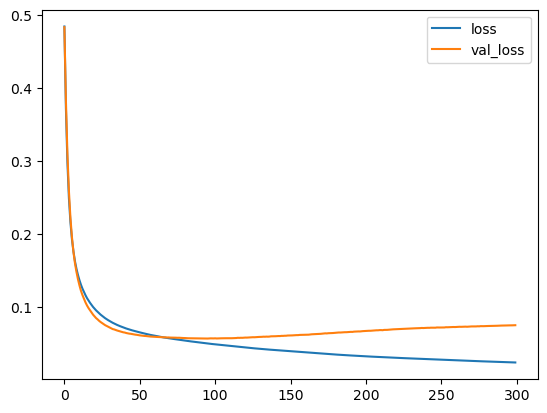

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

model = MLP(
    input_dim=X_train.shape[1],
    layers=(8, 1),
    lr=3e-3,
    epochs=300,
    batch_size=32,
    momentum=0.9,
    l2=1e-4,
    seed=42
)
model.fit(X_train, Y_train, X_test, Y_test)
print(f'accuracy = {model.accuracy(X_test, Y_test)*100}%')

plt.plot(model.history['loss'], label="loss")
plt.plot(model.history['val_loss'], label="val_loss")
plt.legend()
plt.show()